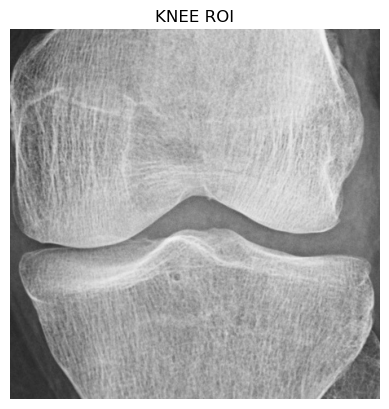

C:\Users\keert\AppData\Local\Temp\ipykernel_17272\1053270622.py:25: RuntimeWarning: overflow encountered in scalar subtract
  cropped = image[center[1]-radius:center[1]+radius, center[0]-radius:center[0]+radius]


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread("C:/Users/keert/Downloads/project/original_image.jpg", cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges using the Canny edge detector
edges = cv2.Canny(gray, 50, 150)

# Apply the Hough Circle Transform
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=100, param2=30, minRadius=0, maxRadius=0)

# If some circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])  # center coordinate
        radius = i[2]  # circle radius

        
        # Crop the image based on the detected circle
        cropped = image[center[1]-radius:center[1]+radius, center[0]-radius:center[0]+radius]
        
        # Save or display the cropped image
        cv2.imwrite('cropped_image.jpg', cropped)
        plt.title('KNEE ROI')
        plt.axis('off')
        plt.imshow(cropped)
        plt.show()
